In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
from scipy.stats import multivariate_normal
%matplotlib inline

# Create the image of a paraboloid with one axis scaled (like an oval paraboloid)

In [ ]:
a = 1
b = 1

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = (X**2)/a + (Y**2)/b

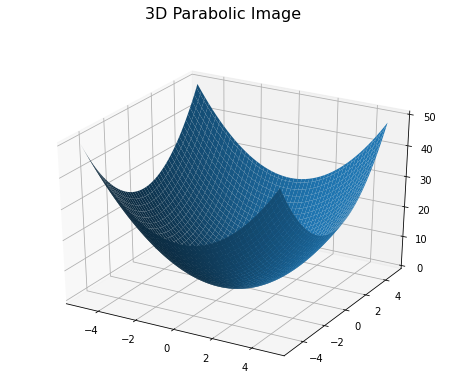

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('3D Parabolic Image', fontsize=16)

# Plot a 3D surface
ax.plot_surface(X, Y, Z)

plt.show()

# Create the image of a rotated sin using rotation of coordinates

In [ ]:
def naive_image_rotate(image, degree):
  (h,w) = image.shape[:2]

  cX = image.shape[0]//2
  cY = image.shape[0]//2

  M = cv2.getRotationMatrix2D((cX, cY), degree, 1.0)
  img = cv2.warpAffine(image, M, (w, h))

  return img

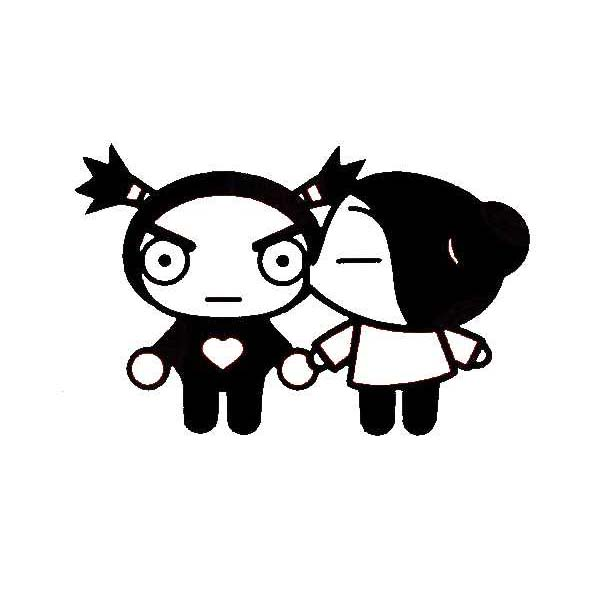

In [ ]:
image = cv2.imread("pucca.jpg")
cv2_imshow(image)

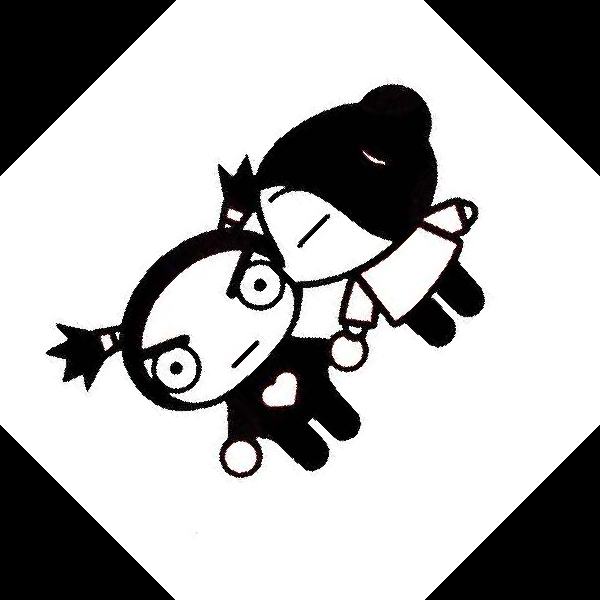

In [ ]:
rotated_image = naive_image_rotate(image,degree=45)
cv2_imshow(rotated_image)

# Create the image of a gaussian

## Equation

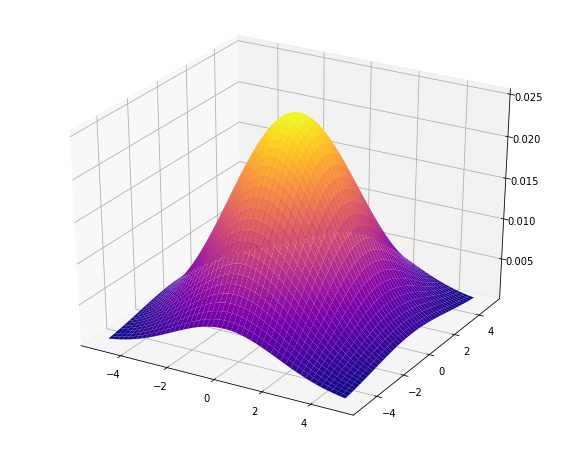

In [ ]:
X = np.linspace(-5,5,50)
Y = np.linspace(-5,5,50)

X, Y = np.meshgrid(X,Y)

X_mean = 0; Y_mean = 0
X_var = 5; Y_var = 8

pos = np.empty(X.shape+(2,))

pos[:,:,0]=X
pos[:,:,1]=Y

rv = multivariate_normal([X_mean, Y_mean],[[X_var, 0], [0, Y_var]])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos), cmap="plasma")

plt.show()

## Applied to image

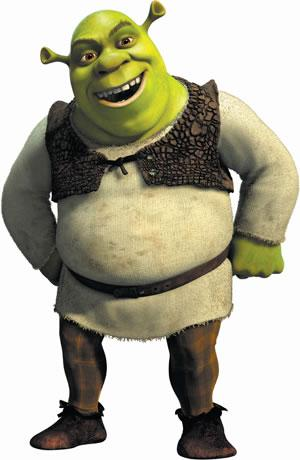

In [ ]:
image = cv2.imread("shrek.jpg", cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

In [ ]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(image,-1,kernel)

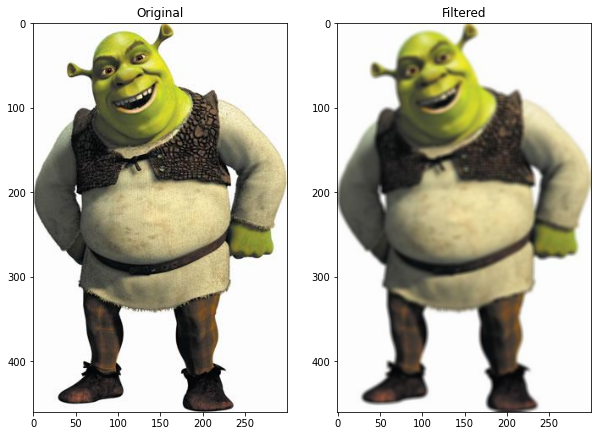

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,8))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')

ax[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
ax[1].set_title('Filtered')

plt.show()

# Create a function that generates the image of a Gaussian optionally rotated by an angle $\theta$ and with mx, my, sx, sy as input arguments

mx = média no eixo x, 

my = média no eixo y, 

sx = desvio padrão no eixo x e 

sy = desvio padrão no eixo y

In [ ]:
def get_gauss(mx, my, sx, sy, theta=None):

  X = np.linspace(-5,5,50)
  Y = np.linspace(-5,5,50)

  X, Y = np.meshgrid(X,Y)

  pos = np.empty(X.shape+(2,))

  pos[:,:,0]=X
  pos[:,:,1]=Y

  rv = multivariate_normal([mx, my],[[sx, 0], [0, sy]])

  fig = plt.figure(figsize=(10,8))

  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, rv.pdf(pos), cmap="plasma")

  if theta:
    ax.view_init(-120, theta)
    
  plt.show()

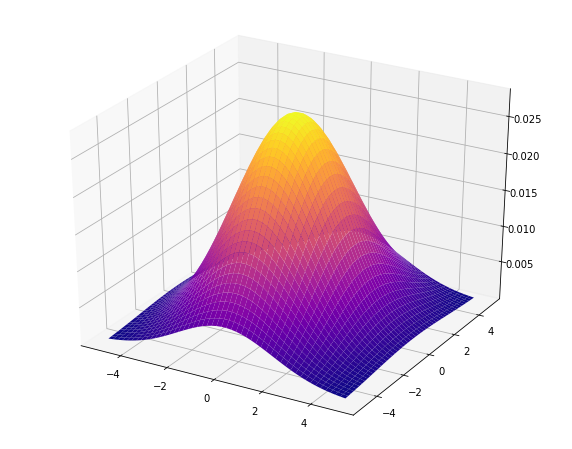

In [ ]:
get_gauss(mx=0, my=0, sx=4, sy=8, theta=None)

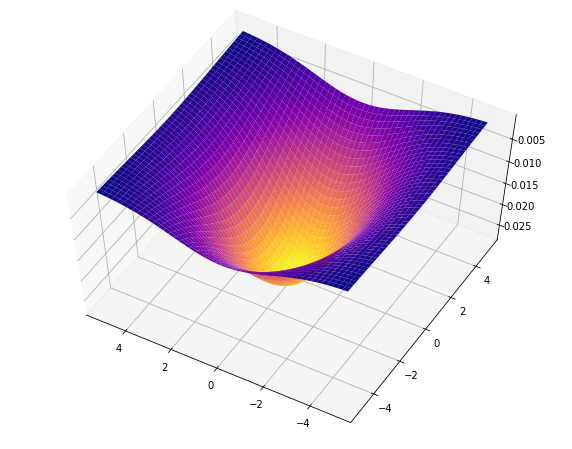

In [ ]:
get_gauss(mx=0, my=0, sx=4, sy=8, theta=60)